# 2487-2223 Machine Learning Assignment 1



## Question 1 (25 points) - Zestimate this House

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 

![zestimate](https://i0.wp.com/www.housesoldeasy.com/wp-content/uploads/Screen-Shot-2016-08-15-at-7.22.09-PM.png?resize=300%2C258&ssl=1)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
### DON'T MODIFY - LOAD DATA ### 

data_url = "http://lib.stat.cmu.edu/datasets/boston" 
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # FEATURES 
y = raw_df.values[1::2, 2] # TARGET VARIABLE
assert X.shape[0] == y.shape[0], 'Mismatch in number of examples.'
print('Data loaded correctly.')
print('Features: X. Target variable (price): y.')
print('X shape: ',X.shape, 'y shape: ', y.shape)
### END ###

Data loaded correctly.
Features: X. Target variable (price): y.
X shape:  (506, 13) y shape:  (506,)


The columns:
| Index | Variable | Description                                                 |
|-------|----------|-------------------------------------------------------------|
| 0     | CRIM     | per capita crime rate by town                              |
| 1     | ZN       | proportion of residential land zoned for lots over 25,000 sq.ft. |
| 2     | INDUS    | proportion of non-retail business acres per town             |
| 3     | CHAS     | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| 4     | NOX      | nitric oxides concentration (parts per 10 million)           |
| 5     | RM       | average number of rooms per dwelling                         |
| 6     | AGE      | proportion of owner-occupied units built prior to 1940       |
| 7     | DIS      | weighted distances to five Boston employment centres        |
| 8     | RAD      | index of accessibility to radial highways                    |
| 9     | TAX      | full-value property-tax rate per $10,000                     |
| 10    | PTRATIO  | pupil-teacher ratio by town                                  |
| 11    | B        | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| 12    | LSTAT    | % lower status of the population                             |
| 13    | MEDV     | Median value of owner-occupied homes in $1000's              |

Label = y = MEDV (price)


#### Question 1.1 (5 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively, using *train_test_split* function in scikit-learn. Train a linear model on the train set and evaluate on the test set, report the training error and test error, respectively (as mean squared error).

In [24]:
seed = 13

# create linear regression object
reg = LinearRegression()

# split data into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

# train the model with training set to find the best parameters for the best-fitting line
reg.fit(X_train, y_train)

# make predictions with train set and compute MSE on train data
y_pred_test = reg.predict(X_train)
error_train = mean_squared_error(y_train, y_pred_test)
    
# make predictions with test data and compute MSE on test data (unseen)
y_pred = reg.predict(X_test)
error_test = mean_squared_error(y_test, y_pred)

print('Training error:', error_train) # how well the model fits the training data
print('Test error:', error_test) # how well the model can predict new, unseen data

Training error: 21.555648194527308
Test error: 24.318238309170436


#### Question 1.2 (5 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold. Explain your findings.

In [51]:
# perform 10-fold cross-validation on dataset with MSE
scores = cross_validate(reg, X, y, scoring='neg_mean_squared_error', cv=10, return_train_score = True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE = scores["train_score"] * -1  # The score array for train scores on each cv split
test_MSE = scores["test_score"] * -1    # The score array for test scores on each cv split

# create dataframe containing the average MSE for train and test set for each fold
mse_df = pd.DataFrame({'train_MSE': train_MSE, 'test_MSE': test_MSE})
mse_df

,train_MSE,test_MSE
0,23.363228,9.286947
1,22.882034,14.151283
2,23.216075,14.073606
3,20.771703,35.206924
4,21.335426,31.885117
5,22.363700,19.835878
6,23.327221,9.947269
7,11.959197,168.375380
8,21.586295,33.329745
9,23.189043,10.960411


Findings: the model's performance is not consistent across folds. The training ... 
<span style="color:red; font-size:20px">Do it later</span>


#### Question 1.3 (5 points) 
 
Add 2-degree squared polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold. Explain your findings.

Hint: you may use sklearn.preprocessing.PolynomialFeatures and check how it produces the polynomial features with/without interaction terms.

In [59]:
# save an instance of PolynomialFeatures with the given degree
# only interaction features are produced (the product of different input features)
polynomial_features = PolynomialFeatures(degree = 2, interaction_only = True)

# create new feature matrix
X_poly = polynomial_features.fit_transform(X) 

# create polynomial regression model
model = LinearRegression()

# fit model to data
model.fit(X_poly, y)

# perform 10-fold cross-validation on dataset with MSE
scores_poly = cross_validate(model, X_poly, y, scoring='neg_mean_squared_error', cv=10, return_train_score = True)

# get train and test MSE from scores dict, multiply by -1 to get positive MSE
train_MSE_poly = scores_poly["train_score"] * -1 
test_MSE_poly = scores_poly["test_score"] * -1 

# create dataframe containing the average MSE for train and test set for each fold
mse_df_poly = pd.DataFrame({'train_MSE': train_MSE_poly, 'test_MSE': test_MSE_poly})
mse_df_poly


,train_MSE,test_MSE
0,6.119547,36.848069
1,7.376263,7.960337
2,6.758835,36.818878
3,5.600621,48.574790
4,6.603907,67.096932
5,7.439783,49.173414
6,6.962492,19.095020
7,7.427591,227.542026
8,5.575876,118.568461
9,6.442055,55.970956


#### Question 1.4 (10 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features obtained earlier respectively. Explain which method works better in this case. Check the coefficients and explain the differences between ridge regression and lasso regression.

The best alpha is: 172.69 (was non-exp: 5.15), with a RSME of 5.423670691674383
So we want to of course find the alpha with the minimum RMSE


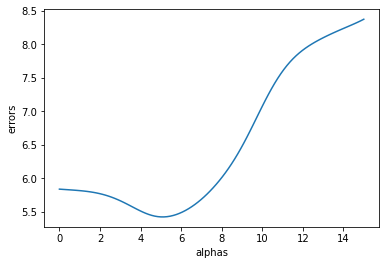

In [62]:
# ridge regression on linear features
errors = []
alphas = np.linspace(0,15,100) # array with 100 values, evenly spaced from 0 to 15

# find the best alpha for ridge regression
for alpha in alphas:
    ridge = Ridge(alpha = np.exp(alpha)) # e ^ alpha
    cv_err = cross_val_score(estimator = ridge, X = X, y = y, scoring = "neg_mean_squared_error", cv=10)
    rmse = (- np.mean(cv_err)) ** 0.5 # RSME = square root of the average of squared errors; sensitive to outliers
    errors.append(rmse)

plt.plot(alphas, errors)
plt.xlabel("alphas")
plt.ylabel("errors")

best_alpha = np.exp(alphas[np.argmin(errors)])
    # np.argmin(errors) : index of minimum error (89)
    # alphas[] : find the value inside alphas of the index of the minimum error
    # np.exp: because input into Ridge was e ^ alpha, get this value !
print("The best alpha is: {} (was non-exp: {}), with a RSME of {}".format(round(best_alpha,2), round(alphas[np.argmin(errors)],2), errors[np.argmin(errors)]))
print("So we want to of course find the alpha with the minimum RMSE")

In [69]:
alphas = np.linspace(0,15,100) # array with 100 values, evenly spaced from 0 to 15

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 5, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

ridge_cv.alpha_

The train score for ridge model is 0.738613036793812
The train score for ridge model is 0.7305986007453265


0.1

In [75]:
clf = Ridge(alpha=5.15)
clf.fit(X, y)

print("Train score", clf.score(X_train, y_train))
print("Test score", clf.score(X_test, y_test))

Train score 0.7322870939308085
Test score 0.7347040482272034


## Question 2 (25 points) - Cancer Detection

Given a dataset with features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which describes characteristics of the cell nuclei present in the image, let's try to predict whether the patients are diagnosed as Malignant (M) or Benign (B).

In [76]:
# LOAD DATA 

from sklearn.datasets import load_breast_cancer
"""
DOCS:
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer
"""
X, y = load_breast_cancer(return_X_y=True)

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Question 2.1 (5 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain your findings.

/Users/hannah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 257.44, 'Predicted label')

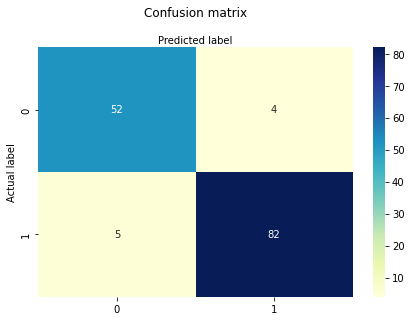

In [87]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

# build a logistic regression model 

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

# fit the model with data
logreg.fit(X_train, y_train)

# predict for new data
y_pred = logreg.predict(X_test)

# previosuly built model, in y_pred have predictions for test set
# compute confusion metrics with actual (test) values and predictions (test set)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
# print("PRECISION:", metrics.precision_score(y_test, y_pred))
# print("Recall:", metrics.recall_score(y_test, y_pred))

In [88]:
# Perform cross-validation on the dataset
scores = cross_val_score(logreg, X, y, cv=5)

# Print the scores
print("Cross-validation scores:", scores)
print("Mean score:", np.mean(scores))

/Users/hannah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hannah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Cross-validation scores: [0.93859649 0.94736842 0.97368421 0.93859649 0.96460177]
Mean score: 0.9525694767893185


/Users/hannah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Question 2.2 (5 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

#### Question 2.3 (15 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation? Now adjust the class weight of M and L and retrain the model again to bias toward Malignant, using the relative weight of M and L as 2:1. What about the relaive weight to be 5:1, or 10:1? Explain what you find.

Hint: you can use LogisticRegressionCV to combine LogisticRegression and cross-validation. 

## Question 3 (50 points) - Call Me Maybe? 



![telemarketing](https://neilpatel.com/wp-content/uploads/2019/08/profissional-de-telemarketing-sorridente.jpeg)

Telemarketing is a method of direct marketing in which a salesperson solicits prospective customers to buy products or services over the phone. It has become one of the most widely used marketing campaign methods to engage with customers with product and service opportunity. We have collected real data from a Portuguese retail bank, from May 2008 to June 2013 with thousands of phone contacts. 




The current practice of many data teams is to build such propensity models and predict customer's probability to adopt the product and target them from the highest probability to the lowest probability. Note that telemarketing may incur some costs for contacting the customer, thus the success (i.e., the generated profit) of using machine learning model requries further inspection.  As the data scientist, you are asked to build a propensity model to evaluate the effectiveness of their telemarketing campaigns, i.e. whether the customer subscribed to the term deposit.  

**Telemarketing Dataset (bank.csv)**
All customers are contained in the file bank.csv. Each line of this file after the header row represents one customer of the Portuguese bank, and has the following format:

### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'primary', 'secondary', 'tertiary')
- balance: amcount of bank account balance
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone', 'unknown')
- day: last contact day of month
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 

### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- y - has the client subscribed a term deposit? (binary: 'yes','no')


Answer the following questions using the provided dataset. You can write down intermediate results towards the final answers. If any model invovles random_state, set it to be 42.

In [26]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [27]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [28]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [29]:
bank.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

### Question 3.1 (15 points)

Split the data into 80% training set and 20% test set. **Build a pipeline to preprocess the indicated numerical features and categorical features separately**. For numerical features 'balance', 'campaign', standardize these features. For categorical features 'job', 'marital', 'education', 'default', transform them through one-hot encoding. For the numeric feature 'age', convert it into the quartile categorical variable and transform it through one-hot encoding. 

Train a Logistic regression model with L2 regularization using 5-fold cross validation (default hyperparameter) on the train set and show the accuracy, precision, recall on the train set. Explain whether the model is useful for the bank to identify the customer propensity.

### Question 3.2 (10 points)

Now add more features to the model to see if we can improve the performance (categorical features: 'housing', 'loan' and numerical features: 'day', 'duration'). Use the preprocess pipeline built previously to transform the data. Train a Logistic regression model with L1 regularization using 5-fold cross validation on the train set, by fine-tuning the hyperparameter alpha, i.e. the regularization strength from [0.001, 0.01, 0.1, 1]. Choose the correct score function that reflect the current data team's practice. Report the average score with the best hyperparameter. Does model performance improve, and if so, how?

Expalin whether all features are useful for making prediction and why. List top 5 features that contribute to the prediction the most. If not all features are useful, list those unuseful features.

### Question 3.3 (10 points)

Now use the best model found in the cross-validation to predict the test set, show the obtained confusion matrix. Assume that targeting each customer would cost 10 euros and if the customer subscribe, the company would earn 50 euros. If we perform targeted telemarketing to all customers that are predicted to subscribe in the test set, what's the resulting profit?

### Question 3.4 (10 points)

Now adjust the decision threshold in order to optimize the obtained profit. What would be the resulting threshold and profit? Is the propensity model built based on the targeting predicted probability useful in terms of profit maximizing? Explain.

### Question 3.5 (5 points)

Now train a random forest model, with 10 decision trees and max_depth=2, what is the profit that can be achieved given the threshold that you identified earlier? Do you need to increase or decrese the threshold to maximize the profit using random forest model? Explain your result.